In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
#clean data
file = '~/galvanize/capstones/PredictingSearches-on-EDGAR/Logs/111001.csv'
df = pd.read_csv(file, names=['IP','Date','Time','Accession'])

In [3]:
Uniq = df.Accession.unique()
u = np.random.choice(Uniq, 10000)

In [4]:
df1 = df[df['Accession'].isin(u)]

In [5]:
df1 = df1.reset_index()

In [6]:
df1['Datetime'] = df1['Date'] + ' ' + df1['Time']
df1['Datetime'] = pd.to_datetime(df1['Datetime'])

In [7]:
df1.shape

(31831, 6)

In [8]:
df1 = df1.drop(['index','IP','Date','Time'],axis=1)

In [9]:
df1.set_index(df1.Datetime, inplace=True)

In [10]:
df1 = df1.drop('Datetime',axis=1)

In [11]:
df1.head()

,Accession
Datetime,
2011-10-01 00:00:00,0001209191-11-040930
2011-10-01 00:00:00,0001209191-11-040930
2011-10-01 00:00:02,0000866273-11-000001
2011-10-01 00:00:02,0000866273-11-000001
2011-10-01 00:00:03,0001292814-11-002587


In [12]:
#Feature Engineering

In [13]:
df1['Counts'] = df1.groupby(df1.Accession).cumcount()+1

In [14]:
df1.head()

,Accession,Counts
Datetime,,
2011-10-01 00:00:00,0001209191-11-040930,1
2011-10-01 00:00:00,0001209191-11-040930,2
2011-10-01 00:00:02,0000866273-11-000001,1
2011-10-01 00:00:02,0000866273-11-000001,2
2011-10-01 00:00:03,0001292814-11-002587,1


In [15]:
df1.shape

(31831, 2)

In [16]:
df_sorted = df1.sort_values('Counts').drop_duplicates('Accession',keep='last')

In [22]:
df_sorted['Popular'] = np.where((df_sorted['Counts']/df_sorted['Counts'].cumsum().max()) < .001,0,1)

In [23]:
df_sorted.tail(60)

,Accession,Counts,Popular
Datetime,,,
2011-10-01 23:10:26,0000899140-11-000474,34,1
2011-10-01 19:44:49,0001225208-11-022292,34,1
2011-10-01 19:44:25,0001183740-11-000696,36,1
2011-10-01 19:44:29,0001183740-11-000694,36,1
2011-10-01 23:51:03,0001193125-11-103802,36,1
2011-10-01 19:44:45,0001179706-11-000158,37,1
2011-10-01 19:45:24,0001181431-11-050682,37,1
2011-10-01 22:40:47,0001464413-11-000136,40,1
2011-10-01 22:55:08,0000950123-11-071709,40,1


In [24]:
#Dividing the dataframe to be able to aggregate data
df_before10 = df1

In [25]:
y_true = df_sorted[['Accession','Popular']]

In [26]:
y_true = df_sorted.set_index('Accession').drop('Counts',axis=1)

In [27]:
y_true.head()

,Popular
Accession,
0001181431-07-021404,0
0001321546-07-000053,0
0000898745-10-000191,0
0001209191-11-018209,0
0001157523-07-007254,0


In [28]:
# Finding values to predict

In [29]:
# Merge df_sorted to df1 to get column for prediction

In [30]:
df1 = df1.reset_index()
df_sorted = df_sorted.reset_index()

In [31]:
# df1['cc'] = df1.groupby(df1.index).cumcount()
# df_sorted['cc'] = df_sorted.groupby(df_sorted.index).cumcount()

In [32]:
X = pd.merge(df1, df_sorted[['Accession','Popular']], on='Accession',how='left')

In [33]:
X.head()

,Datetime,Accession,Counts,Popular
0,2011-10-01 00:00:00,0001209191-11-040930,1,0
1,2011-10-01 00:00:00,0001209191-11-040930,2,0
2,2011-10-01 00:00:02,0000866273-11-000001,1,0
3,2011-10-01 00:00:02,0000866273-11-000001,2,0
4,2011-10-01 00:00:03,0001292814-11-002587,1,1


In [34]:
X.shape

(31831, 4)

In [35]:
X = X.set_index('Datetime')

In [36]:
X.head()

,Accession,Counts,Popular
Datetime,,,
2011-10-01 00:00:00,0001209191-11-040930,1,0
2011-10-01 00:00:00,0001209191-11-040930,2,0
2011-10-01 00:00:02,0000866273-11-000001,1,0
2011-10-01 00:00:02,0000866273-11-000001,2,0
2011-10-01 00:00:03,0001292814-11-002587,1,1


In [37]:
y_true1 = X.pop('Popular').values

In [38]:
X.head()

,Accession,Counts
Datetime,,
2011-10-01 00:00:00,0001209191-11-040930,1
2011-10-01 00:00:00,0001209191-11-040930,2
2011-10-01 00:00:02,0000866273-11-000001,1
2011-10-01 00:00:02,0000866273-11-000001,2
2011-10-01 00:00:03,0001292814-11-002587,1


In [39]:
y_true1

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [40]:
X['Popular_Before10'] = np.where((X['Counts']/X['Counts'].cumsum().max()) < .005,0,1)

In [41]:
docnames = X.pop('Accession').values

In [42]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y_true1, test_size=0.2, random_state=0)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2873
           1       0.99      0.96      0.97      3494

    accuracy                           0.97      6367
   macro avg       0.97      0.97      0.97      6367
weighted avg       0.97      0.97      0.97      6367

Accuracy: 0.9709439296371918


In [45]:
## imports
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import itertools
import scipy.stats as stats
#from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score


import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [46]:
km = KMeans(n_clusters=2, max_iter=100)
y_kmeans = km.fit_predict(X_train)
centriods = km.cluster_centers_

In [47]:
X_train.shape

(25464, 2)

ValueError: x and y must be the same size

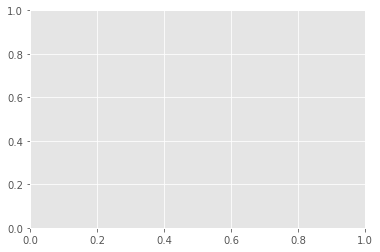

In [48]:
plt.scatter(X_train, y_train, c=y_kmeans, s=50, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers, centers, c='black', s=200, alpha=0.2)
plt.title("K-Means Clustering of Documents on EDGAR")

In [ ]:
# X = data before 10 am

In [ ]:
# y = data after 10 am 

In [66]:
from sklearn.preprocessing import PolynomialFeatures

In [67]:
mer['Counts'] = mer['Counts'].fillna('0')

In [33]:
y = mer.pop('Total_Counts').values

In [34]:
mer['Counts'] = mer['Counts'].fillna(0)

In [35]:
mer.Counts = mer.Counts.astype('int') 

In [36]:
X = mer

In [37]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [59]:
from sklearn.metrics import mean_squared_error, r2_score
def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

In [60]:
create_polynomial_regression_model(3)

The model performance for the training set
-------------------------------------------
RMSE of training set is 22.46111507526903
R2 score of training set is 0.6975869033452862


The model performance for the test set
-------------------------------------------
RMSE of test set is 30.24278762141459
R2 score of test set is 0.7861632673940702


In [61]:
create_polynomial_regression_model(2)

The model performance for the training set
-------------------------------------------
RMSE of training set is 22.785842903313597
R2 score of training set is 0.6887795207316705


The model performance for the test set
-------------------------------------------
RMSE of test set is 22.4260390216805
R2 score of test set is 0.882417194670966


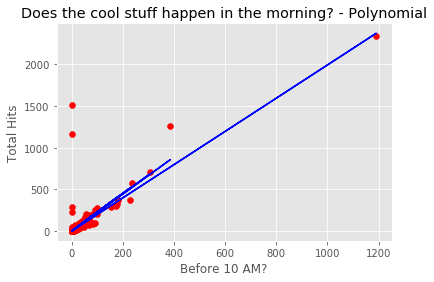

In [49]:
def viz_poly():
    plt.scatter(X_train, y_train, color='red')
    plt.plot(X_train, y_poly_pred, color='blue')
    plt.title('Does the cool stuff happen in the morning? - Polynomial')
    plt.xlabel('Before 10 AM?')
    plt.ylabel('Total Hits')
    plt.show()
    return
viz_poly()

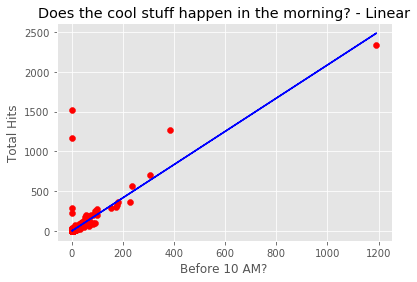

In [45]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X_train, y_train, color='red')
    plt.plot(X_train, lin_reg.predict(X_train), color='blue')
    plt.title('Does the cool stuff happen in the morning? - Linear')
    plt.xlabel('Before 10 AM?')
    plt.ylabel('Total Hits')
    plt.show()
    return
viz_linear()

In [62]:
## imports
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import itertools
import scipy.stats as stats
#from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score


import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [63]:
km = KMeans(n_clusters=2, max_iter=100)
y_kmeans = km.fit_predict(X_train)
centriods = km.cluster_centers_

Text(0.5, 1.0, 'K-Means Clustering of Documents on EDGAR')

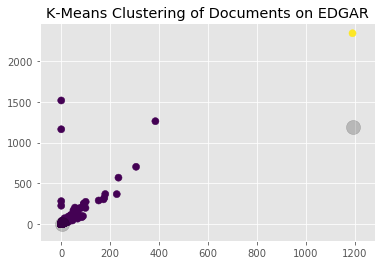

In [64]:
plt.scatter(X_train, y_train, c=y_kmeans, s=50, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers, centers, c='black', s=200, alpha=0.2)
plt.title("K-Means Clustering of Documents on EDGAR")

In [ ]:
#works because not complicated

In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# mat = confusion_matrix(y_kmeans, y_train)
# sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
#             xticklabels=docnames,
#             yticklabels=docnames)
# plt.xlabel('true label')
# plt.ylabel('predicted label');

In [65]:
score = silhouette_score(X_train, y_kmeans)
print("For n_clusters = {}, silhouette score is {})".format(2, score))

For n_clusters = 2, silhouette score is 0.9973717265850774)


In [66]:
#ROC Curve

In [70]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]



# calculate scores
#ns_auc = roc_auc_score(y_test, ns_probs)
pr_auc = roc_auc_score(y_test, y_poly_pred)
km_auc = roc_auc_score(y_test, y_kmeans)
# summarize scores
#print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Polynomial: ROC AUC=%.3f' % (pr_auc))
print('KMeans-Clustering: ROC AUC=%.3f' % (km_auc))
# calculate roc curves
#ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pr_fpr, pr_tpr, _ = roc_auc_curve(y_test, pr_probs)
km_fpr, km_tpr, _ = roc_auc_curve(y_test, km_probs)

# plot the roc curve for the model
#pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(pr_fpr, pr_tpr, marker='.', label='Polynomial')
pyplot.plot(km_fpr, km_tpr, marker='^', label='KMeans')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

ValueError: multi_class must be in ('ovo', 'ovr')